In [54]:
import requests
import geopandas as gpd
import pandas as pd
from io import StringIO
from fiona.crs import from_string
import matplotlib.pyplot as plt

In [44]:
def read_ca_map():
    ca_map = gpd.read_file("./map_data/CA_Counties/CA_Counties_TIGER2016.shp")
    crs = from_string("+proj=longlat +datum=WGS84 +no_defs")
    ca_map = ca_map.to_crs(crs)
    return ca_map 

In [45]:
ca_map = read_ca_map()

/var/folders/h9/6347jhns5fv4jgpmcl4fl7dh0000gn/T/ipykernel_87198/4191322177.py:1: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_string() instead.
  ca_map = read_ca_map()


In [61]:
def get_sensor_list(bbox):
    api_headers = {'X-API-Key': 'A9084A32-4059-11EE-A77F-42010A800009'}
    nwlng = bbox[0]
    nwlat = bbox[1]
    selng = bbox[2]
    selat = bbox[3]
    fields = ['latitude', 'longitude']
    params = {
        "fields": ",".join(fields),
        "nwlng": nwlng,
        "nwlat": nwlat,
        "selng": selng,
        "selat": selat,
    }
    url = "https://api.purpleair.com/v1/sensors"
    r = requests.get(url, headers=api_headers, params=params)
    df = pd.DataFrame(r.json()['data'], columns=r.json()['fields'])
    
    return df

In [62]:
# Set raw bbox
tulare_bbox = (-119.577944, 36.746966, -117.974112, 35.782986)

In [63]:
# Get map
tulare_map = ca_map[ca_map["NAME"] == "Tulare"]

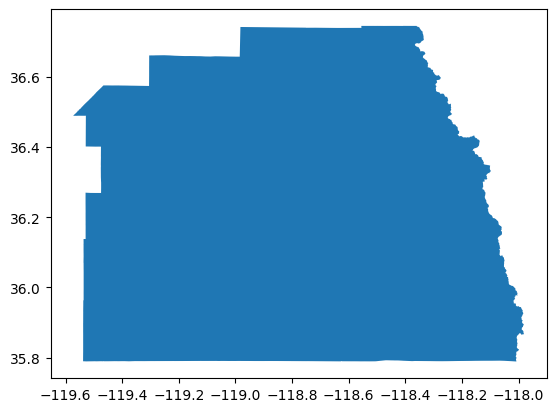

In [64]:
tulare_map.plot()
plt.show()

In [66]:
tulare_sensors_raw = get_sensor_list(tulare_bbox)
tulare_sensors_raw

,sensor_index,latitude,longitude
0,11116,36.454044,-118.890610
1,11118,36.453445,-118.909546
2,12825,36.280730,-118.777150
3,16131,36.227844,-119.343290
4,16153,36.228775,-119.341760
5,17567,36.605816,-119.449810
6,17569,36.643460,-119.484860
7,33945,36.305305,-119.151000
8,40989,35.959682,-119.039505
9,44581,36.275370,-119.135765


In [67]:
# find intersection using geopandas
tulare_sensors = gpd.GeoDataFrame(
    tulare_sensors_raw, 
    geometry=gpd.points_from_xy(tulare_sensors_raw.longitude, tulare_sensors_raw.latitude)
)
tulare_sensors.crs = from_string("+proj=longlat +datum=WGS84 +no_defs")
tulare_sensors = gpd.sjoin(tulare_sensors, tulare_map, how="inner", op="intersects")
tulare_sensors

/Users/shangjiedu/anaconda3/envs/env_ai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,sensor_index,latitude,longitude,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,11116,36.454044,-118.890610,POINT (-118.89061 36.45404),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
1,11118,36.453445,-118.909546,POINT (-118.90955 36.45345),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
2,12825,36.280730,-118.777150,POINT (-118.77715 36.28073),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
3,16131,36.227844,-119.343290,POINT (-119.34329 36.22784),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
4,16153,36.228775,-119.341760,POINT (-119.34176 36.22877),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
7,33945,36.305305,-119.151000,POINT (-119.15100 36.30530),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
8,40989,35.959682,-119.039505,POINT (-119.03951 35.95968),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
9,44581,36.275370,-119.135765,POINT (-119.13577 36.27537),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
10,44597,36.218090,-119.096640,POINT (-119.09664 36.21809),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610
11,44633,36.308200,-119.312980,POINT (-119.31298 36.30820),45,06,107,00277318,06107,Tulare,...,H1,G4020,546,47300,None,A,12495016292,37081410,+36.2288241,-118.7810610


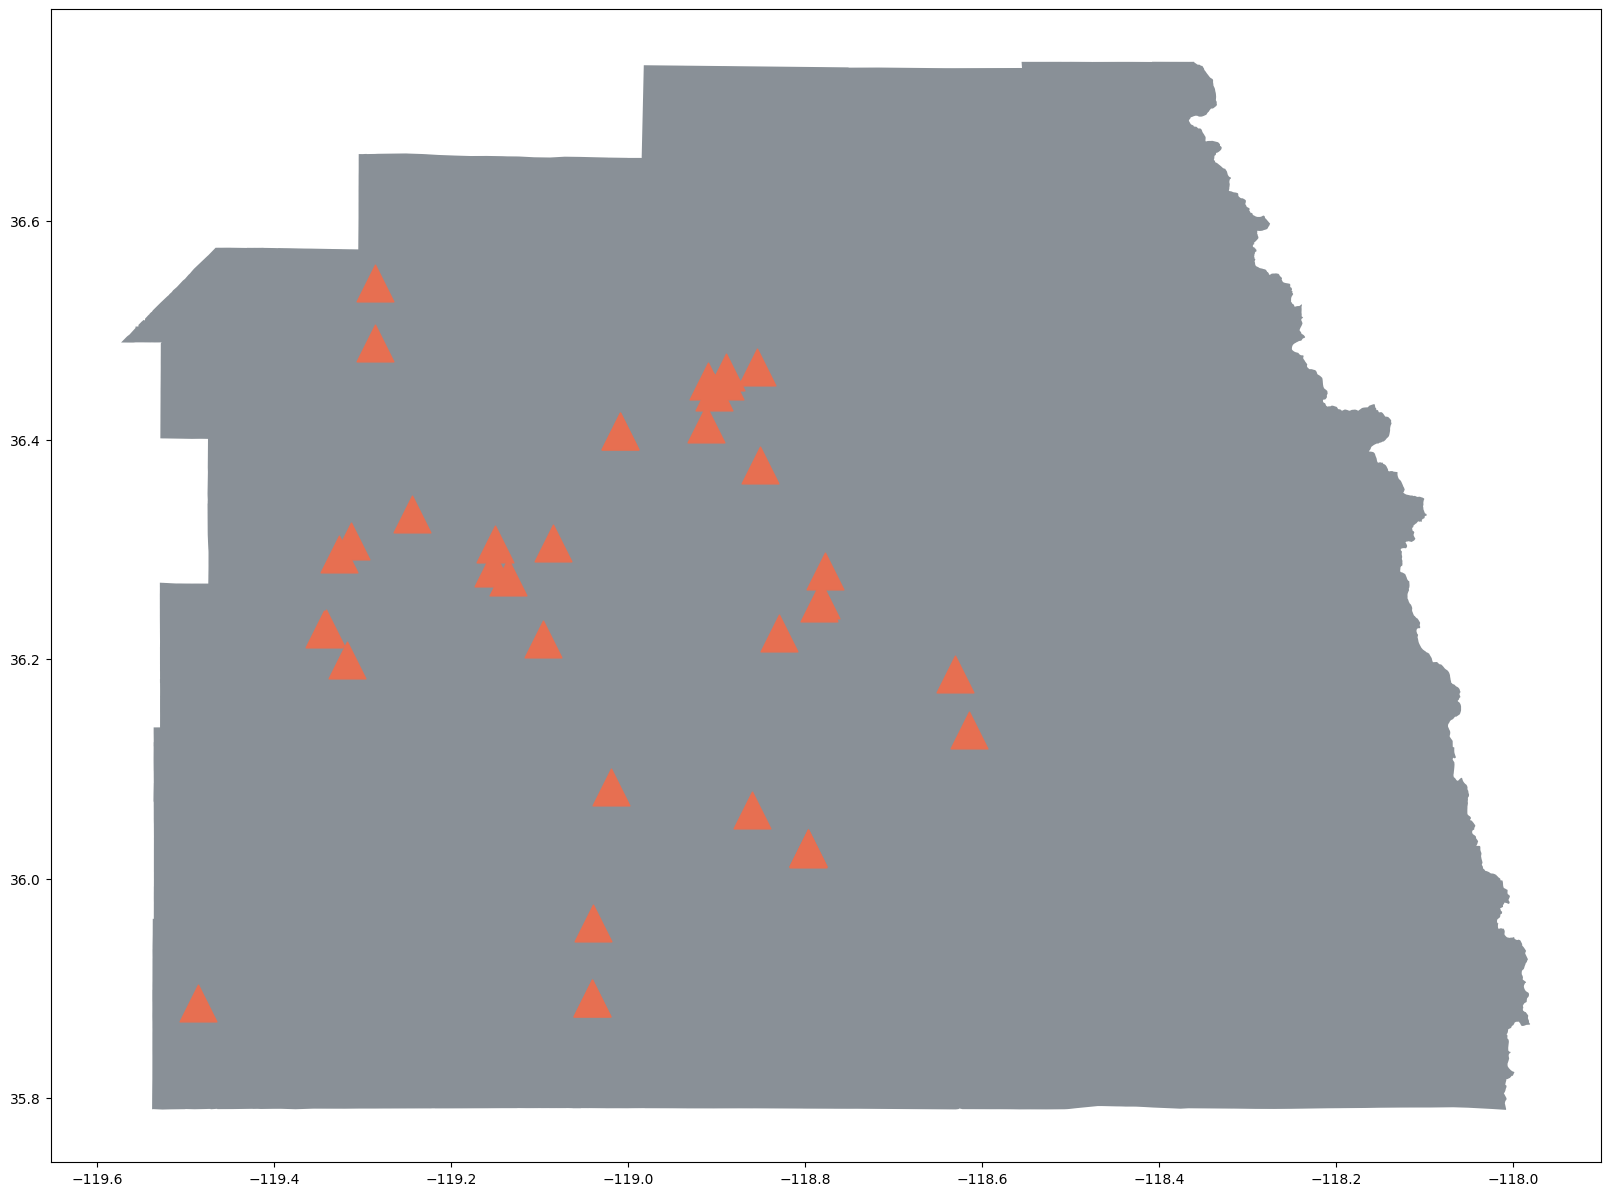

In [85]:
fig, ax = plt.subplots(figsize=(20, 20))
tulare_map.plot(ax=ax, alpha=0.8, color="#6c757d")
tulare_sensors.plot(ax=ax, color="#e76f51", marker="^", markersize=700)
fig.savefig("tulare_sensors.png")
plt.show()

<Axes: >

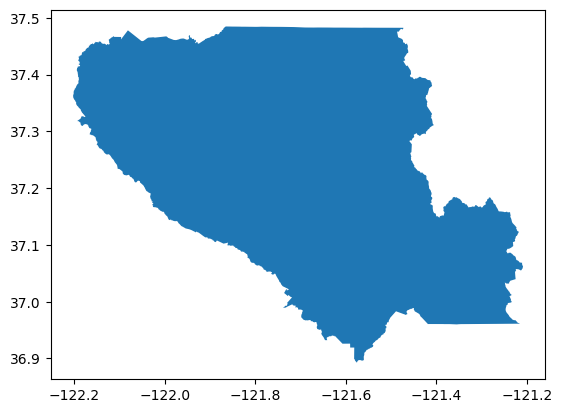

In [87]:
sc_map = ca_map[ca_map["NAME"] == "Santa Clara"]
sc_map.plot()

In [88]:
sc_bbox = (-122.3, 37.5, -121.2, 36.9)

In [89]:
sc_sensors_raw = get_sensor_list(sc_bbox)
sc_sensors_raw

,sensor_index,latitude,longitude
0,1860,37.107620,-121.946400
1,2858,37.324482,-122.062096
2,2916,37.362175,-122.065560
3,3015,37.374470,-122.083300
4,3327,37.418682,-122.157560
...,...,...,...
2242,198215,37.218730,-121.851395
2243,198223,36.973297,-122.039770
2244,198545,36.994907,-122.054060
2245,198555,37.256290,-122.019820


In [90]:
# find intersection using geopandas
sc_sensors = gpd.GeoDataFrame(
    sc_sensors_raw, 
    geometry=gpd.points_from_xy(sc_sensors_raw.longitude, sc_sensors_raw.latitude)
)
sc_sensors.crs = from_string("+proj=longlat +datum=WGS84 +no_defs")
sc_sensors = gpd.sjoin(sc_sensors, sc_map, how="inner", op="intersects")
sc_sensors

/Users/shangjiedu/anaconda3/envs/env_ai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,sensor_index,latitude,longitude,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
1,2858,37.324482,-122.062096,POINT (-122.06210 37.32448),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
2,2916,37.362175,-122.065560,POINT (-122.06556 37.36218),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
3,3015,37.374470,-122.083300,POINT (-122.08330 37.37447),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
4,3327,37.418682,-122.157560,POINT (-122.15756 37.41868),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
5,3336,37.304996,-121.917920,POINT (-121.91792 37.30500),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,197847,37.430447,-122.137630,POINT (-122.13763 37.43045),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
2241,198065,37.357540,-121.887820,POINT (-121.88782 37.35754),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
2242,198215,37.218730,-121.851395,POINT (-121.85139 37.21873),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224
2245,198555,37.256290,-122.019820,POINT (-122.01982 37.25629),38,06,085,00277307,06085,Santa Clara,...,H1,G4020,488,41940,None,A,3344210021,33276429,+37.2207774,-121.6906224


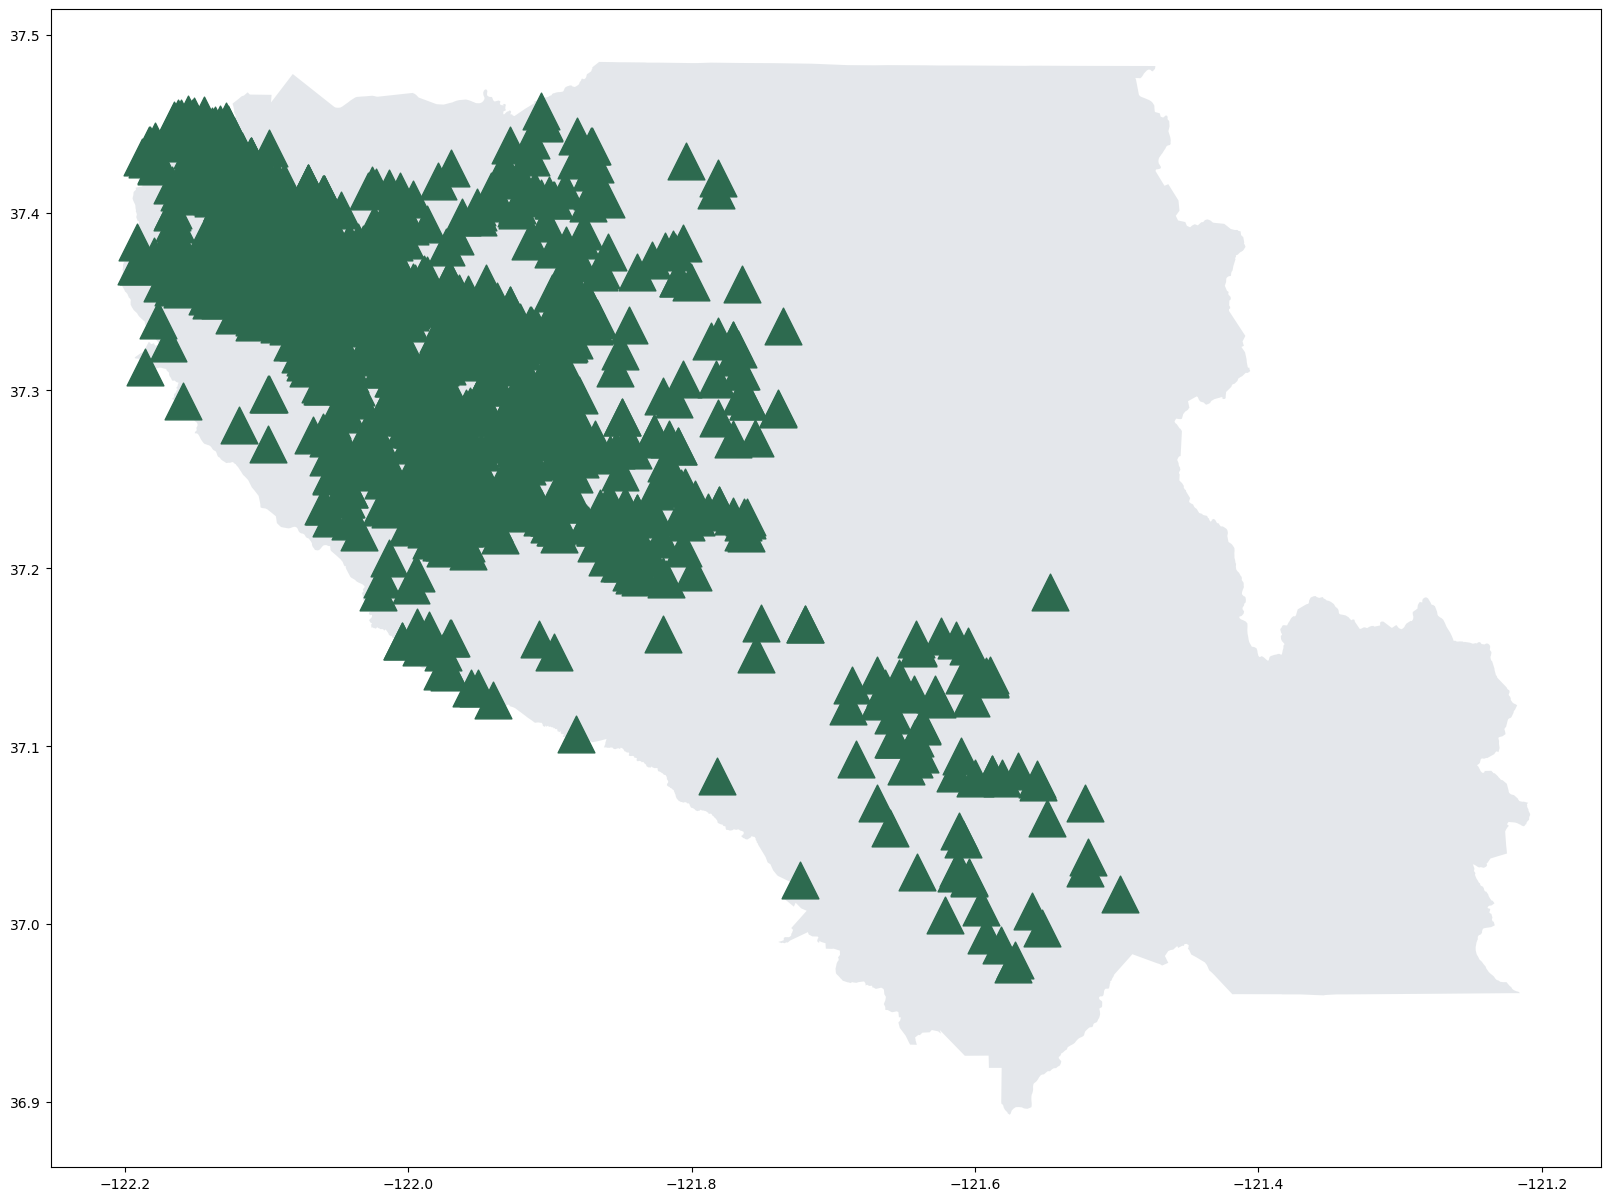

In [91]:
fig, ax = plt.subplots(figsize=(20, 20))
sc_map.plot(ax=ax, alpha=0.8, color="#dee2e6")
sc_sensors.plot(ax=ax, color="#2d6a4f", marker="^", markersize=700)
fig.savefig("santaclara_sensors.png")
plt.show()

In [58]:
bbox = (-120.518276, 37.342942, -120.404985, 37.267492,)
api_headers = {'X-API-Key': 'A9084A32-4059-11EE-A77F-42010A800009'}
nwlng = bbox[0]
nwlat = bbox[1]
selng = bbox[2]
selat = bbox[3]
fields = ['latitude', 'longitude']
params = {
    "fields": ",".join(fields),
    "nwlng": nwlng,
    "nwlat": nwlat,
    "selng": selng,
    "selat": selat,
}
url = "https://api.purpleair.com/v1/sensors"
r = requests.get(url, headers=api_headers, params=params)


In [59]:
r.text

'{\n  "api_version" : "V1.0.11-0.0.49",\n  "time_stamp" : 1699117826,\n  "data_time_stamp" : 1699117764,\n  "max_age" : 604800,\n  "firmware_default_version" : "7.02",\n  "fields" : ["sensor_index","latitude","longitude"],\n  "data" : [\n    [14617,37.328754,-120.46203],\n    [92145,37.326138,-120.483925],\n    [104106,37.308353,-120.48012],\n    [104208,37.281788,-120.43369],\n    [113586,37.332104,-120.438255],\n    [155683,37.33223,-120.48513],\n    [167073,37.3293,-120.43555]\n  ]\n}'

In [60]:
pd.DataFrame(r.json()['data'], columns=r.json()['fields'])

,sensor_index,latitude,longitude
0,14617,37.328754,-120.462030
1,92145,37.326138,-120.483925
2,104106,37.308353,-120.480120
3,104208,37.281788,-120.433690
4,113586,37.332104,-120.438255
5,155683,37.332230,-120.485130
6,167073,37.329300,-120.435550
